In [57]:
# -*- coding = utf-8 -*-
from keras.datasets import mnist
import numpy as np

In [58]:
%pwd 
# %cp /home/Downloads/mnist.npz /home/tf/dl_fun/05_autoEncode/data/mnist.npz

'/home/tf/dl_fun/05_autoEncode/code'

In [59]:
# (x_train, _),(x_test ,_ ) = mnist.load_data()
f = np.load('/home/tf/dl_fun/05_autoEncode/data/mnist.npz')
x_train,x_test = f['x_train'] , f['x_test']
# x_train , x_test

In [60]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train , (len(x_train) , 28 , 28 , 1))
x_test = np.reshape(x_test , (len(x_test) , 28 , 28 ,  1))

In [61]:
noise_factor = 0.5
x_train_noise = x_train + noise_factor * np.random.normal(loc = 0 , scale = 1 , size = x_train.shape)
x_test_noise = x_test + noise_factor * np.random.normal(loc = 0 , scale = 1 , size = x_test.shape)
x_train_noise = np.clip(x_train_noise , 0., 1.)
x_test_noise = np.clip(x_test_noise , 0. , 1.)

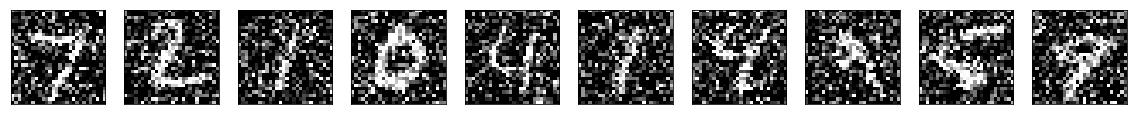

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10

plt.figure(figsize = (20 , 2))
for i in range(n):
    ax = plt.subplot(1 , n , i+1)
    plt.imshow(x_test_noise[i].reshape(28 , 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False) 


In [31]:
from keras.layers import Input , Conv2D , MaxPooling2D ,UpSampling2D
from keras.models import Model ,load_model

In [66]:
image_input = Input(shape = (28 , 28 , 1 ,))
x = Conv2D(32 , (3 , 3) , padding = 'same' , activation='relu')(image_input) # N*28*28*32
x = MaxPooling2D(pool_size=(2,2) , padding = 'same')(x) # N*14*14*32
x = Conv2D(32 , (3 ,3) , padding = 'same' , activation = 'relu')(x) # N*14*14*32
encoding = MaxPooling2D(pool_size  = (2 , 2) , padding = 'same')(x) # N*7*7*32

In [67]:
x = Conv2D(32 , (3 , 3) , padding = 'same' , activation = 'relu')(encoding) # N*7*7*32
x = UpSampling2D(size = (2 , 2))(x)
x = Conv2D(32 , (3 , 3) , padding = 'same' , activation = 'relu')(x)
x = UpSampling2D(size = (2 , 2))(x)
decoding = Conv2D(1, (3 ,3) , padding = 'same' , activation = 'sigmoid')(x)

In [68]:
autoencoder = Model(image_input, decoding)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [78]:
autoencoder.fit(x_train_noise, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noise, x_test))
autoencoder.save('/home/tf/dl_fun/05_autoEncode/model/autoencoder.h5')

In [76]:
autoencoder = load_model('/home/tf/dl_fun/05_autoEncode/model/autoencoder.h5')
decode_img = autoencoder.predict(x_test_noise)

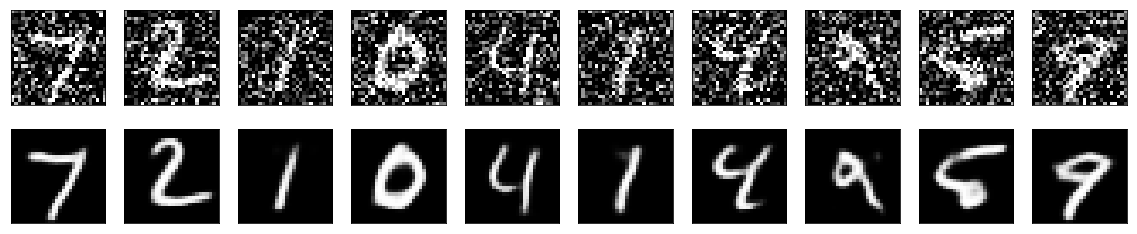

In [77]:
%matplotlib inline
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decode_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
